LOF(X)=[(LRD(1st neighbor) + LRD(2nd neighbor ) + .................+ LRD(kth neighbor))/LRD(X)]/k

LRD(X) = 1/(sum of Reachability Distance (X, n))/k)

where n is neighbors upto k

Hyperparameter k: determines the number of neighbors
    
Reachability distance: distances measured using 3 methods — Euclid, Minkowski, Manhattan
    
Local reachability distance: (LRD) (X) = 1/(sum of Reachability Distance (X, n))/k), where n is neighbors upto k
    
Local Outlier Factor (LOF)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

In [68]:
random.seed(1)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(10,10))

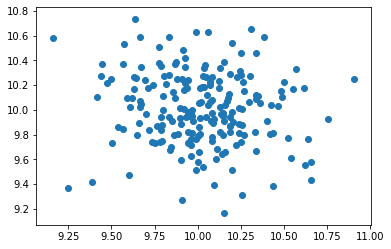

In [69]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [73]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.05)
y_pred = lof.fit_predict(x)

In [74]:
lofs_index = where(y_pred==-1)
values = x[lofs_index]

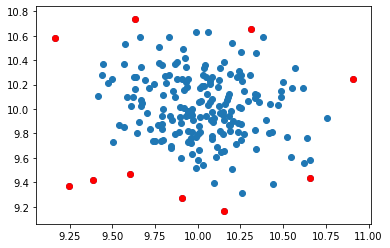

In [75]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

Anomaly detection with scores

In [76]:
model = LocalOutlierFactor(n_neighbors=20) 
model.fit_predict(x)
lof = model.negative_outlier_factor_ 

In [79]:
model.negative_outlier_factor_

array([-1.120606  , -1.14437502, -0.99761787, -0.9941928 , -1.31099752,
       -1.53859625, -1.00406782, -1.24131522, -1.02656272, -1.03895608,
       -0.98068138, -1.51716114, -1.0986004 , -0.96976527, -0.99681183,
       -2.10995972, -0.990004  , -1.12563559, -0.98989089, -1.17292571,
       -1.29835171, -1.06911188, -1.11539664, -1.24947982, -1.06220226,
       -1.05388469, -0.95570855, -1.04979114, -0.97850653, -1.31895222,
       -0.98508492, -1.02020752, -1.34179377, -0.98711207, -1.05601573,
       -1.11017117, -0.98090169, -1.08393311, -1.10587828, -0.98820498,
       -1.05107291, -1.16466334, -1.09608812, -0.95578131, -1.03617146,
       -1.7089345 , -1.071127  , -2.01755187, -0.98726336, -0.98854588,
       -1.00793811, -0.98753404, -1.10186464, -1.19970701, -1.16704079,
       -1.3786222 , -1.4378395 , -1.33413937, -0.95541535, -1.13472903,
       -1.08859912, -1.01056098, -1.27781974, -0.97305452, -1.06819691,
       -1.01166087, -0.98291307, -0.98960872, -1.36164516, -1.21

In [77]:
thresh = quantile(lof, .03)
print(thresh)

-1.8191482960907037


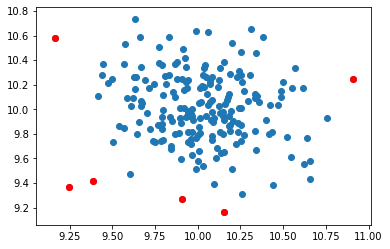

In [78]:
index = where(lof<=thresh)
values = x[index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')

Height_weight dataset

In [86]:
df = pd.read_csv('weight-height.csv')
df.drop(['Gender'],1,inplace=True)
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


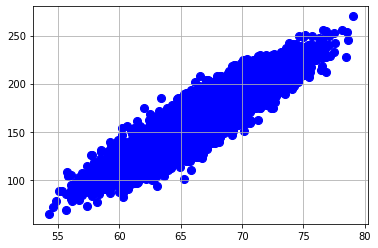

In [87]:
plt.scatter(df["Height"], df["Weight"], color = "b", s = 65)
plt.grid()

In [105]:
# model specification
# model = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.03)
model = LocalOutlierFactor(n_neighbors = 30)

In [106]:
# model fitting
y_pred = model.fit_predict(df)

In [107]:
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers and positives inliers

In [108]:
# filter outlier values
outlier_values = df.iloc[outlier_index]

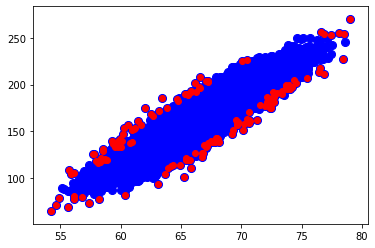

In [109]:
# plot data
plt.scatter(df["Height"], df["Weight"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["Height"], outlier_values["Weight"], color = "r")
